In [1]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# locate and confirm current working directory
os.path.abspath('.')
os.chdir("/Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge")
os.getcwd()
print("The current working directory is", os.getcwd())

The current working directory is /Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge


In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "/Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge/mouse_drug_data.csv"
clinical_trial_data_to_load = "/Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge/clinical_trial_data.csv"

In [5]:
# Read the Mouse and Drug Data
# load the csv files into pandas dataframe
filepath = os.path.join("raw_data","/Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge/mouse_drug_data.csv")
mouse_drug_data_df = pd.read_csv(filepath)
mouse_drug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
mouse_drug_data_df["Drug"].nunique()

10

In [7]:
# Read the Clinical Trial Data
# load the csv files into pandas dataframe
filepath2 = os.path.join("raw_data","/Users/philipharmon/Desktop/unc-data-homework/matplotlib-challenge/clinical_trial_data.csv")
clinical_trial_data_df = pd.read_csv(filepath2)
clinical_trial_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single data
mouse_data_complete_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")
mouse_data_complete_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [9]:
mouse_data_complete_df.dtypes

Mouse ID               object
Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [10]:
mouse_data_complete_df["Drug"].nunique()

10

In [11]:
# Display table for preview
mouse_data_complete_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Tumor Response To Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_treatment_response_mean = mouse_data_complete_df.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
tumor_treatment_response_mean = pd.DataFrame(tumor_treatment_response_mean)

# Preview DataFrame
tumor_treatment_response_mean.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_treatment_response_mean = tumor_treatment_response_mean.reset_index()
tumor_treatment_response_pivot_mean = tumor_treatment_response_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [14]:
# Preview that reformatting worked
tumor_treatment_response_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_treatment_response_sem = mouse_data_complete_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

In [16]:
# Convert to DataFrame
tumor_treatment_response_sem = pd.DataFrame(tumor_treatment_response_sem)

In [17]:
# Preview DataFrame
tumor_treatment_response_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [18]:
 # Minor Data Munging to Re-Format the Data Frames
tumor_treatment_response_sem = tumor_treatment_response_sem.reset_index()
tumor_treatment_response_pivot_sem = tumor_treatment_response_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [19]:
# Preview that Reformatting worked
tumor_treatment_response_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


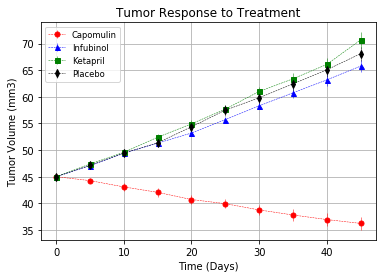

In [20]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Capomulin"], yerr=tumor_treatment_response_pivot_sem["Capomulin"], label="Capomulin", color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Infubinol"], yerr=tumor_treatment_response_pivot_sem["Infubinol"], label="Infubinol", color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Ketapril"], yerr=tumor_treatment_response_pivot_sem["Ketapril"], label="Ketapril", color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_treatment_response_pivot_mean.index, tumor_treatment_response_pivot_mean["Placebo"], yerr=tumor_treatment_response_pivot_sem["Placebo"], label="Placebo", color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

In [21]:
# Save the Figure
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [22]:
# Show the Figure plt.show()
plt.show()

Metastatic Response to Treatment

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
tumor_met_response_mean = mouse_data_complete_df.groupby(["Drug", "Timepoint"]).mean()

In [24]:
# Convert to DataFrame
tumor_met_response_mean = pd.DataFrame(tumor_met_response_mean)

In [25]:
# Preview DataFrame
tumor_met_response_mean.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [26]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_response_mean = tumor_met_response_mean.reset_index()
tumor_met_response_pivot_mean = tumor_met_response_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]


In [27]:
# Preview that Reformatting worked
tumor_met_response_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
tumor_met_response_sem = mouse_data_complete_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

In [29]:
# Convert to DataFrame
tumor_met_response_sem = pd.DataFrame(tumor_met_response_sem)

In [30]:
# Preview DataFrame
tumor_met_response_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [31]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_response_sem = tumor_met_response_sem.reset_index()
tumor_met_response_pivot_sem = tumor_met_response_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [32]:
# Preview that Reformatting worked
tumor_met_response_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


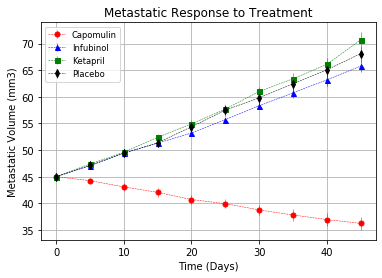

In [33]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Capomulin"], yerr=tumor_met_response_pivot_sem["Capomulin"], label="Capomulin", color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Infubinol"], yerr=tumor_met_response_pivot_sem["Infubinol"], label="Infubinol", color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Ketapril"], yerr=tumor_met_response_pivot_sem["Ketapril"], label="Ketapril", color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_met_response_pivot_mean.index, tumor_met_response_pivot_mean["Placebo"], yerr=tumor_met_response_pivot_sem["Placebo"], label="Placebo", color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Response to Treatment")
plt.ylabel("Metastatic Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

In [34]:
# Save the Figure
plt.savefig("analysis/Fig2.png")

<Figure size 432x288 with 0 Axes>

In [35]:
# Show the Figure
plt.show()

Survival Rates

In [36]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_treatment_count = mouse_data_complete_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

In [37]:
# Convert to DataFrame
mice_treatment_count = pd.DataFrame({"Mouse Count": mice_treatment_count})

In [38]:
# Preview DataFrame
mice_treatment_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [39]:
# Minor Data Munging to Re-Format the Data Frames
mice_treatment_count = mice_treatment_count.reset_index()
mice_treatment_pivot_count = mice_treatment_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

In [40]:
# Preview the Data Frame
mice_treatment_pivot_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


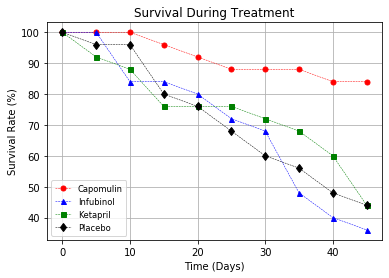

In [41]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_treatment_pivot_count["Capomulin"] / 25, "ro", label="Capomulin", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Infubinol"] / 25, "b^", label="Infubinol", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Ketapril"] / 25, "gs", label="Ketapril", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_treatment_pivot_count["Placebo"] / 25 , "kd", label="Placebo", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

In [42]:
# Save the Figure
plt.savefig("analysis/Fig3.png")

<Figure size 432x288 with 0 Axes>

In [43]:
# Show the Figure
plt.show()


Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_treatment_response_pivot_mean.iloc[-1] - tumor_treatment_response_pivot_mean.iloc[0]) / tumor_treatment_response_pivot_mean.iloc[0]
tumor_pct_change_sem =  100 * (tumor_treatment_response_pivot_sem.iloc[-1] - tumor_treatment_response_pivot_sem.iloc[0]) / tumor_treatment_response_pivot_sem.iloc[0]

In [49]:
# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [37]:
# Store all Relevant Percent Changes into a Tuple

In [38]:
# Splice the data between passing and failing drugs